In [1]:
#include <iostream>
#include <string>
#include <stdio.h> 

In [2]:
TFile *file = TFile::Open("../Tracks_Clusters.root");
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print();

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

# Exercise 4

In [3]:
float evtw = -1;
vector<float> *reco_R4_pt;
vector<float> *truth_R4_pt;
vector<float> *reco_R10_pt;
vector<float> *truth_R10_pt;
vector<float> *reco_R4_jvf;

tree->SetBranchAddress("EventWeight",&evtw);
tree->SetBranchAddress("RecoJets_R4_pt",&reco_R4_pt);
tree->SetBranchAddress("TruthJets_R4_pt",&truth_R4_pt);
tree->SetBranchAddress("RecoJets_R10_pt",&reco_R10_pt);
tree->SetBranchAddress("TruthJets_R10_pt",&truth_R10_pt);
tree->SetBranchAddress("RecoJets_R4_jvf",&reco_R4_jvf);

TH1F *hist_leadrecopt_cut_jvf = new TH1F("Lead Reco-jet w.o. cut JVF","Leading jet JVF; JVF;Events",20,-1000,1000);
TH1F *hist_leadtruthpt_jvf = new TH1F("Lead Truth-jet JVF","Leading jet JVF;pT (GeV);Events",50,0,1000);
TH1F *hist_leadrecopt_jvf = new TH1F("Lead Reco-jet cut JVF","Leading jet JVF;pT (GeV);Events",50,0,1000);

TCanvas *canvas = new TCanvas("Canvas","",800,600);

In [4]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    
    if(truth_R4_pt->size()>0){
        for(int j=0;j<truth_R4_pt->size();j++){
            hist_leadtruthpt_jvf->Fill(truth_R4_pt->at(0)/1000.,evtw);
        }
    }
    
    if(reco_R4_pt->size()>0){
        for(int j=0;j<reco_R4_pt->size();j++){
            hist_leadrecopt_jvf->Fill(reco_R4_pt->at(0)/1000.,evtw);
        }
    }
    
    if(reco_R4_pt->size()>0){
        if(reco_R4_jvf->at(0)<-0.5 || reco_R4_jvf->at(0)>0.5){
            hist_leadrecopt_cut_jvf->Fill(reco_R4_jvf->at(0),evtw);
            //for(int j=0;j<reco_R4_pt->size();j++){
                //hist_leadrecopt_cut_jvf->Fill(reco_R4_pt->at(0)/1000.,evtw);
            //}
        }
    }   
}
   
std::cout << "Done!" << std::endl;

Done!


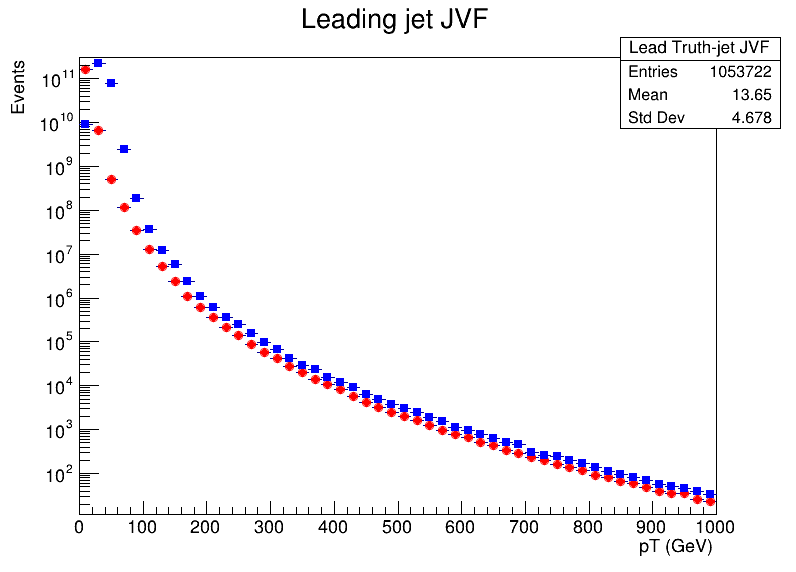

In [5]:
hist_leadtruthpt_jvf->SetMarkerStyle(20);
hist_leadtruthpt_jvf->SetMarkerColor(kRed);
hist_leadtruthpt_jvf->Draw("");
hist_leadrecopt_jvf->SetMarkerStyle(21);
hist_leadrecopt_jvf->SetMarkerColor(kBlue);
hist_leadrecopt_jvf->Draw("same");
//hist_leadrecopt_cut_jvf->SetMarkerStyle(22);
//hist_leadrecopt_cut_jvf->SetMarkerColor(kGreen);
//hist_leadrecopt_cut_jvf->Draw("same");
canvas->SetLogy();
canvas->Draw();

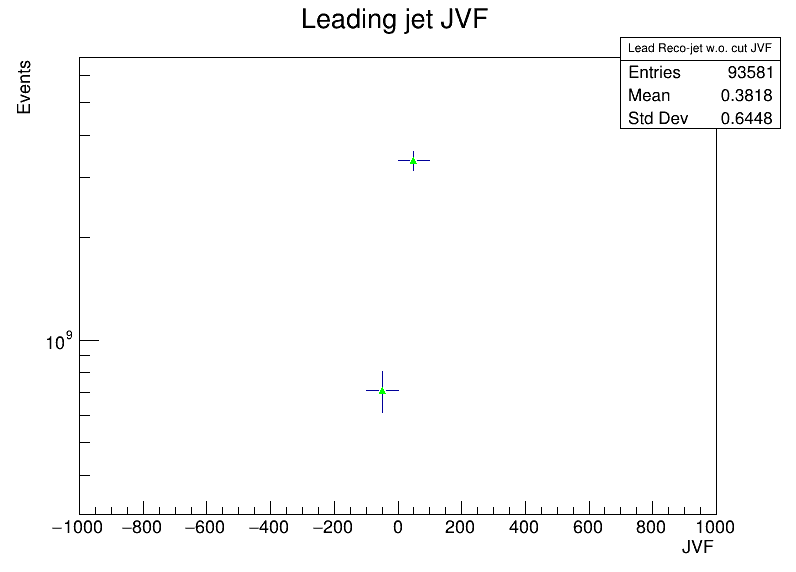

In [6]:
hist_leadrecopt_cut_jvf->SetMarkerStyle(22);
hist_leadrecopt_cut_jvf->SetMarkerColor(kGreen);
hist_leadrecopt_cut_jvf->Draw("");
canvas->Draw();